Heigon Soldera  217638  
Rafael Galib  204904

# Introdução

 Nesta atividade nos foi dada a incumbência de implementar métodos não supervisionados para agrupamento em bases de dados. No contexto da atividade, chamaremos agrupamento por clusterização,termo advindo do neologismo.
    Os objetivos constiuem-se de:  
        - Implementar o método K-means, que será abordado mais adiante.  
        - Implementar um método a nossa escolha, no caso DBScan.  
        - Tratar os dados contidos na base fornecida pela Professora, assim como a de nossa escolha.  
        - Averiguar, por meio de métricas, quais configurações iniciais seriam as mais adequadas.  
        - Executar ambos métodos para a base da Professora.  
        - Executar ambos para a base de nossa escolha.  
        - Executar o PCA na base de nossa escolha ara reduzir as dimensões e assim executar somente o K-means.  

# Imports

Nesta seção são importadas todas as bibliotecas desejadas para a execução da atividade.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import itertools
import collections
import queue
import scipy.io as spio

# Função aLabel

A função aLabel (lê-se: assign label) utiliza de uma sequência de dados X, assim como centros previamente definidos.

In [2]:
def aLabel(X, centers):
    # Cáculo de distância
    dist = np.array([[np.linalg.norm(x - y) for x in centers] for y in X])
    mins = np.array([m.min() for m in dist]).T

    labs = np.array([np.where(mins[i] == dist[i]) for i in range(len(mins))]).T

    return labs[0][0]

# K-means

Aqui encontra-se nossa implementação do k-means. Temos, para um número predefinido de clusters, a associação dos pontos do conjunto X ao grupo cujo centro se encontra mais próximo em distância. Ao final de cada iteração do método, temos novos centros sendo definidos, o que nos faz esperar que uma convergência esteja ocorrendo. Uma vez verificada a convergência, o método interrompe-se.

In [3]:

def Kmeans(X, n_clusters):
    # Escolhe centros aleatórios
    solving = True 
    rng = np.random.RandomState(2)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while solving:
        # Definimos labels para os pontos mais próximos dos centros
        labels = aLabel(X, centers)
        
        # Encontra novos centros
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Verifica se convergiu
        if np.all(centers == new_centers):
            solving = False
        centers = new_centers
    
    return centers, labels

# Min Max

Este método serve para normalizar as dimensões de uma base de dados. Para cada dimensão, normalizamos todos os valores baseados no valor máximo e no valor mínimo. Para tanto, utilizamos a fórmula:
$$( new\_val = \frac{old\_val \times md \times scale}{  Md - md} )$$
Onde Md e md são o valor máximo e o mínimo, respectivamente, de uma dada dimensão, e scale é um valor arbitrário para o qual se deseja que seja o novo máximo.

In [4]:

def MinMax(xy):
    features = []
    results = []
    newXY = []

    # Agrupa cada coordenada de um ponto em uma lista dentro de features e results
    for i in range(len(xy[0])):
        aux1 = []
        aux2 = []
        for j in range(len(xy)):
            aux1.append(xy[j][i])
            aux2.append(xy[j][i])
        features.append(aux1)
        results.append(aux2)


    # Normaliza os dados em results a partir dos dados em features
    for i in range(len(features)):
        for j in range(len(features[i])):
            results[i][j] = ((features[i][j] - min(features[i])) * 30) / (max(features[i])-min(features[i]))

    # Retorna para a configuração de lista de pontos
    for i in range(len(results)):
        for j in range(len(results[i])):
            if i == 0:
                aux = [results[i][j]]
                newXY.append(aux)
            else:
                newXY[j].append(results[i][j])
                
    return np.array(newXY)
    

# Lendo cluster.dat

Nesta seção é realizado a leitura dos dados no arquivo cluster.dat

In [5]:
with open('cluster.dat') as f:
    lines = f.readlines()
    xy = np.array([[float(line.split()[0]),float(line.split()[1])] for line in lines])

# Normalizando cluster.dat

Aplicado a função MinxMax sobre os dados lidos.

In [6]:
xy = MinMax(xy)

# Separação treinamento e teste

Funcão para separar aleatoriamente os dados entre 90% de treinamento e 10% para teste.

In [7]:

def dataSplit(dataset):
    p90 = int(len(dataset)* 90/100)

    rng = np.random.RandomState(15)
    i = rng.permutation(dataset.shape[0])

    Points_Training =dataset[i[:p90]]
    Points_Test=dataset[i[p90:len(dataset)]]

    return Points_Training,Points_Test



# Separando o cluster.dat em Treinamento e Teste
Aplicado a função para separar o dataset e como possuem 2 dimensões foi plotado para melhor visualização.

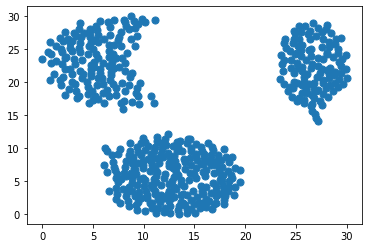

In [8]:
PointsTrainingK1,PointsTestK1 = dataSplit(xy)
plt.scatter(PointsTrainingK1[:, 0], PointsTrainingK1[:, 1], s=50)
plt.show()

# Método Cotovelo

Rodando o K-means sobre os dados de treinamento várias vezes para decidir o melhor número de clusters a partir do Elbow Method.

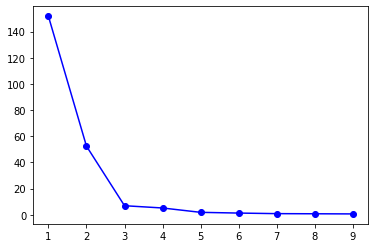

In [9]:
temp_epsilon = []
num_cluster = range(1,10)
# Percorre clusters de 1 a 9
for k in num_cluster:
    centersK1, labelsK1 = Kmeans(PointsTrainingK1, k)
    # Descomentar linhas abaixo para ver resultados para cada k
    # plt.scatter(PointsTrainingK1[:, 0], PointsTrainingK1[:, 1], c=labels,s=50, cmap='viridis')
    # plt.show()
    for p in range(k):
        n=0
        for x in centersK1: 
            z=0
            # Calcula a distância quadrática de cada ponto para o centro do seu cluster
            for i in range(len(labelsK1)):
                if labelsK1[i] == p:
                    z += np.linalg.norm(PointsTrainingK1[i] - x)**2
                    n+=1 
    # Divide a distância quadrática pelo número de pontos 
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"bo-")
plt.show()

A partir da análise do gráfico gerado, podemos concluir que o melhor número de clusters seria 3.

# K-means nos dados de treinamento
Após ter sido escolhido $k=3$, aplicamos o K-means sobre os dados de treinamento com esse parâmetro e o foi plotado os clusters obtidos.

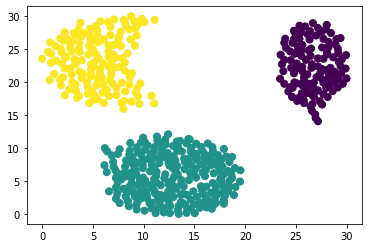

In [10]:
centersK1, labelsK1 = Kmeans(PointsTrainingK1, 3)
plt.scatter(PointsTrainingK1[:, 0], PointsTrainingK1[:, 1], c=labelsK1,s=50, cmap='viridis')
plt.show()

# Teste Kmeans

Agora será utilizado os dados de teste separados no início. Cada ponto no teste foi atribuído ao cluster de centro mais próximo do ponto.

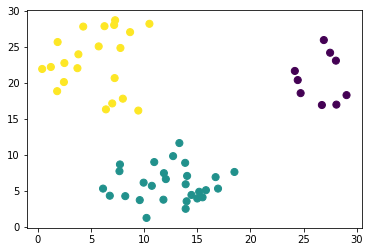

In [11]:
labelsTestK1 = aLabel(PointsTestK1, centersK1)
plt.scatter(PointsTestK1[:, 0], PointsTestK1[:, 1], c=labelsTestK1,s=50, cmap='viridis')
plt.show()

Podemos verificar que os dados de teste realmente ficaram próximos do cluster esperado, dado sua configuração.

# DBScan
Foi escolhido o DBScan para o segundo método de clusterização não supervisionado. A partir daqui será explicado como foi sua implementação.

# Função para encontrar pontos vizinhos

Primeiro foi implementado uma função para calcular os pontos que estão de dentro de um raio (radius passado como parâmetro da função), para um determinado ponto (pointId) em um conjunto de dados (data).

In [12]:
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

# Implementação DBScan
Aqui encontra-se a função que implementa o DBScan propriamente dito. Definimos valores que identificam os pontos, -1 para core (Possui a quantidade de pontos mínimos em sua volta) e -2 para edge (Não possui a quantidade de pontos mínimos em sua vizinhança, mas possui um core). Após isso calcula-se quantos vizinhos cada ponto tem e define eles como, core,edge ou outlier. Assim é possível clusterizar utilizando a estrutura de dados queue para auxiliar.


In [13]:


def DBScan(dataSet, radius, minPt):

    # Definição para os pontos
    core = -1
    edge = -2

    pointLabel  = [0] * len(dataSet) #Possui a definição de cada ponto, 0 outlier, -1 core e -2 edge. Inicializa com todos 0. No fim guardará qual cluster cada ponto pertence
    pointCount = [] #Quantidade de vizinhos e quais são eles para cada ponto.
    corePoint=[] #Guarda os core points
    nonCore=[] #Guarda os edges points
    

    # Percorre por cada ponto encontrando os vizinhos
    for i in range(len(dataSet)):
        pointCount.append(neighbor_points(dataSet,i,radius))

    
    # Se possuir mais pontos vizinhos do que minPt é atrbuído como core point
    for i in range(len(pointCount)):
        if (len(pointCount[i])>=minPt):
            pointLabel[i]=core
            corePoint.append(i)
        else:
            nonCore.append(i)

    # Percoree todos nonCOre, se possuir um core em sua vizinhança é atribuído como edge point
    for i in nonCore:
        for j in pointCount[i]:
            if j in corePoint:
                pointLabel[i]=edge
                break

    # Inicia a clusterização       
    cluster = 1 # Inicia em pois 0 é outlier
    # Percorre todos os pontos
    for i in range(len(pointLabel)):
        q = queue.Queue() # Inicia uma fila vazia
        if (pointLabel[i] == core): # Se for core atribui o cluster atual ao ponto
            pointLabel[i] = cluster
            for x in pointCount[i]: # Percorre os pontos vizinhos do core, se for core coloca na fila, senão atribui o cluster atual ao ponto vizinho
                if(pointLabel[x]==core):
                    q.put(x)
                    pointLabel[x]=cluster
                elif(pointLabel[x]==edge):
                    pointLabel[x]=cluster 
            while not q.empty(): # Enquanto a fila não estiver vazia repete o processo
                neighbors = pointCount[q.get()]
                for y in neighbors:
                    if (pointLabel[y]==core):
                        pointLabel[y]=cluster
                        q.put(y)
                    if (pointLabel[y]==edge):
                        pointLabel[y]=cluster            
            cluster+=1 # Ao finalizar procura um novo cluster
           
    return pointLabel,cluster # Retorna a qual cluster cada ponto foi atribuído e o número total de clusters

# Função para plotar o resultado do DBScan
Para melhor vizualização dos clusters essa função atribui cores aos clusters e azul aos outliers

In [14]:
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

# Rodando vários DBscan para selecionar melhor raio $\epsilon$ e número mínimo de pontos
Esse segmento possui operações custosas e podem demorar a executar segue um pdf e um html nesse diretório para visualizar os resultados.  
São rodados vários DBScan, variando o número de $\epsilon$ e pontos mínimos, para assim, deduzir quais podem melhor representar a clusterização do dataset e determinar a qual cluster novos pontos pertencem.

In [15]:
PointsTrainingDB1,PointsTestDB1 = dataSplit(xy) #Separando os dados em novas variáveis

In [16]:
epss = 10
minptss = 10

# Listas para guardar os resultados para análise futura
Leps = []
Lminpts = []
Lcluster = []
Lout = []

for eps in range(1,epss): # epsilon varia de 1 a 9
    for minpts in range(2,minptss): # pontos mínimos variam de 2 a9

        print('Epsilon = ' +str(eps)+ ', Pontos mínimos = '+str(minpts)) # Parametros atuais

        pointlabelDB1,clustersB1 = DBScan(PointsTrainingDB1,eps,minpts) # Aplica DBScan

        # Descomente as linhas seguintes para visualizações parciais
        # plotRes(PointsTrainingDB1, pointlabelDB1, clustersB1)
        # plt.show()

        print('Número de clusters encontrados: ' + str(clustersB1-1))
        counter=collections.Counter(pointlabelDB1)
        print(counter)

        outliers  = pointlabelDB1.count(0)
        print('Número de Outliers encontrados: '+str(outliers) +'\n')

        Leps.append(eps)
        Lminpts.append(minpts)
        Lcluster.append(clustersB1-1)
        Lout.append(outliers)



Epsilon = 1, Pontos mínimos = 2
Número de clusters encontrados: 7
Counter({1: 239, 2: 133, 3: 121, 0: 8, 4: 5, 6: 5, 5: 2, 7: 2})
Número de Outliers encontrados: 8

Epsilon = 1, Pontos mínimos = 3
Número de clusters encontrados: 5
Counter({1: 239, 2: 133, 3: 121, 0: 12, 4: 5, 5: 5})
Número de Outliers encontrados: 12

Epsilon = 1, Pontos mínimos = 4
Número de clusters encontrados: 8
Counter({1: 238, 2: 112, 3: 99, 0: 31, 4: 16, 5: 11, 7: 3, 8: 3, 6: 2})
Número de Outliers encontrados: 31

Epsilon = 1, Pontos mínimos = 5
Número de clusters encontrados: 13
Counter({1: 234, 0: 82, 5: 42, 3: 36, 2: 30, 8: 17, 7: 15, 9: 14, 6: 10, 10: 10, 13: 8, 4: 7, 11: 7, 12: 3})
Número de Outliers encontrados: 82

Epsilon = 1, Pontos mínimos = 6
Número de clusters encontrados: 14
Counter({1: 216, 0: 136, 4: 40, 6: 24, 9: 14, 2: 13, 10: 12, 3: 11, 5: 11, 7: 8, 13: 7, 14: 6, 8: 6, 11: 6, 12: 5})
Número de Outliers encontrados: 136

Epsilon = 1, Pontos mínimos = 7
Número de clusters encontrados: 12
Counter

# Escolhendo $\epsilon$ e pontos mínimos para DBScan

Foi utilizado 2 gráficos 3D para podermos escolher os melhores parâmetros.  
Um possui $\epsilon$  $\times$ MinPoints $\times$ Número de clusters.  
O outro $\epsilon$  $\times$ MinPoints $\times$ Outliers.

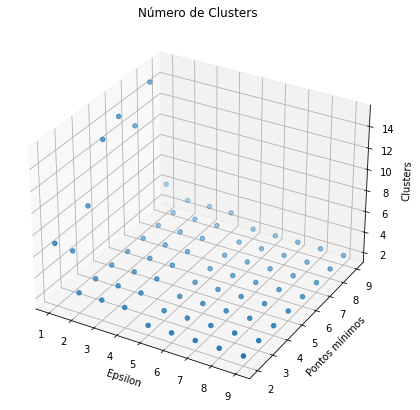

In [17]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(Leps, Lminpts, Lcluster)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Clusters")
plt.title("Número de Clusters")
 
plt.show()

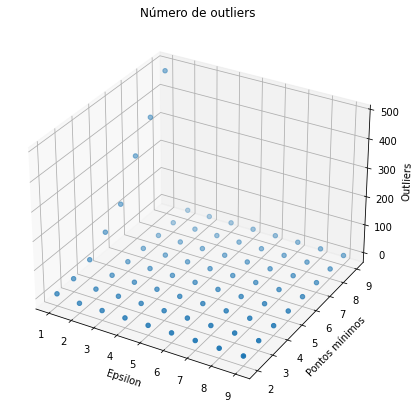

In [18]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(Leps, Lminpts, Lout)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Outliers")
plt.title("Número de outliers")
 
plt.show()

Foi possível identificar no gráfico 1 um padrão semelhante ao método do cotovelo, a partir de 3 clusters o gráfico estabilizou e foi diminuindo o número de clusters com pequenas alterações. Com auxílio do segundo gráfico vimos que a partir de $\epsilon = 2$ não possuía mais Outliers.  
A partir dessas análises decidimos escolher o menor ponto onde iniciou a estabilização do gráfico 1 (O menor para evitar overfeating) e possua poucos outliers, no caso todos possuem 0 a partir da estabilização. Sendo assim escolhemos $\epsilon = 2$ e Pontos mínimos = 2.

# DBScan com $\epsilon$ e pontos mínimos escolhido

Aplicamos o DBScan com os parâmetros escolhidos e plotamos o resultado final

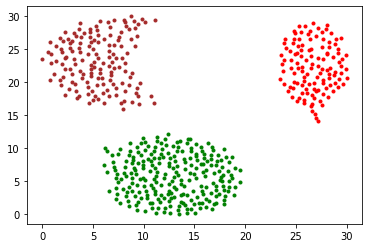

In [19]:
pointlabelDB1,clustersDB1 = DBScan(PointsTrainingDB1,2,2)
plotRes(PointsTrainingDB1, pointlabelDB1, clustersDB1)
plt.show()

# Teste DBScan
Agora será utilizado os dados de Teste separados inicialmente. Para atribuir o ponto de teste a um cluster foi selecionado o cluster do ponto que está na vizinhança $\epsilon$ do teste.

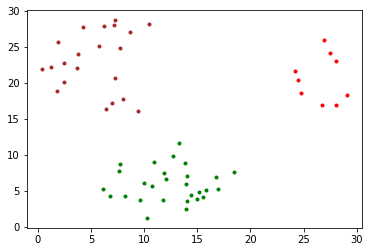

In [20]:

labels_points_test = []

for i in range(len(PointsTestDB1)):
    for j in range(len(PointsTrainingDB1)):
        if np.linalg.norm(PointsTestDB1[i] - PointsTrainingDB1[j]) <= 2:
            labels_points_test.append(pointlabelDB1[j])
            break

plotRes(PointsTestDB1, labels_points_test, clustersDB1)
plt.show()
            

Podemos ver resultado semelhante ao K-means

# Testando o método utilizado para selecionar os parâmetros do DBScan
Para possuir algum tipo de validação que o método utilizado para selecionar os parâmetros pode funcionar decidimos testar com um dataset conhecido.
Geramos um dataset a partir da lib sklearn com exatos 5 clusters, e gostariámos de testar se ao realizar uma análise semelhante seria possível encontrar os 5 clusters.

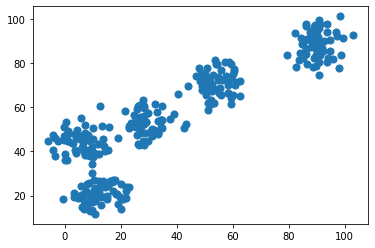

In [21]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=5,center_box=(0, 100), random_state=3)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [22]:
epss = 10
minptss = 10

Leps = []
Lminpts = []
Lcluster = []
Lout = []

for eps in range(2,epss):
    for minpts in range(2,minptss):

        print('Epsilon = ' +str(eps)+ ', Pontos mínimos = '+str(minpts))
        pointlabel,cl = DBScan(X,eps,minpts)
        # plotRes(X, pointlabel, cl)
        # plt.show()
        print('Número de clusters encontrados: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('Número de outliers encontrados: '+str(outliers) +'\n')
        if(cl-1 < 12):
            Leps.append(eps)
            Lminpts.append(minpts)
            Lcluster.append(cl-1)
            Lout.append(outliers)

Epsilon = 2, Pontos mínimos = 2
Número de clusters encontrados: 46
Counter({0: 64, 7: 18, 10: 16, 14: 15, 27: 15, 30: 13, 16: 12, 26: 11, 11: 10, 13: 8, 22: 7, 6: 6, 18: 6, 8: 5, 21: 5, 24: 5, 29: 5, 1: 4, 4: 4, 25: 4, 31: 4, 43: 4, 2: 3, 3: 3, 9: 3, 17: 3, 19: 3, 28: 3, 38: 3, 41: 3, 44: 3, 5: 2, 12: 2, 15: 2, 20: 2, 23: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 39: 2, 40: 2, 42: 2, 45: 2, 46: 2})
Número de outliers encontrados: 64

Epsilon = 2, Pontos mínimos = 3
Número de clusters encontrados: 30
Counter({0: 96, 3: 18, 6: 16, 10: 15, 20: 15, 23: 13, 11: 12, 19: 11, 7: 10, 9: 8, 16: 7, 12: 6, 13: 6, 4: 5, 15: 5, 17: 5, 22: 5, 1: 4, 8: 4, 18: 4, 24: 4, 29: 4, 27: 3, 2: 3, 5: 3, 25: 3, 14: 3, 21: 3, 26: 3, 28: 3, 30: 3})
Número de outliers encontrados: 96

Epsilon = 2, Pontos mínimos = 4
Número de clusters encontrados: 20
Counter({0: 149, 2: 18, 11: 15, 10: 15, 15: 14, 3: 10, 9: 9, 5: 8, 12: 7, 6: 7, 19: 6, 7: 5, 13: 5, 16: 5, 1: 4, 4: 4, 20: 4, 8: 4, 14: 4, 18: 4, 17: 3})
Número de

[4, 4, 4] [7, 8, 9] [5, 5, 5]
[5, 5, 5] [7, 8, 9] [5, 5, 5]


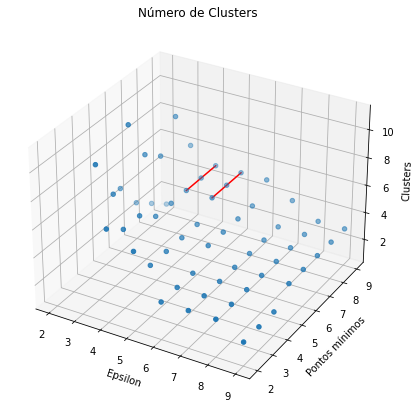

In [23]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(Leps, Lminpts, Lcluster)
ax.plot(Leps[16:19], Lminpts[16:19], Lcluster[16:19],"r-")
ax.plot(Leps[24:27], Lminpts[24:27], Lcluster[24:27],"r-")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Clusters")
plt.title("Número de Clusters")

print(Leps[16:19], Lminpts[16:19], Lcluster[16:19])
print(Leps[24:27], Lminpts[24:27], Lcluster[24:27])
 

plt.show()

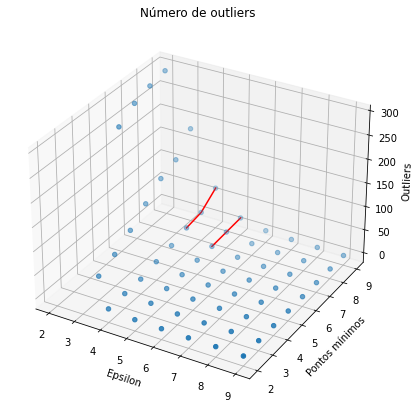

In [24]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(Leps, Lminpts, Lout)
ax.plot(Leps[16:19], Lminpts[16:19], Lout[16:19],"r-")
ax.plot(Leps[24:27], Lminpts[24:27], Lout[24:27],"r-")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Outliers")
plt.title("Número de outliers")
 

plt.show()

Aplicando a mesma análise encontrariámos na região demarcada com linhas vermelha uma estabilização semelhante a ocorrida anteriormente, e selecionando o menor ponto com menor número de outliers chega-se em  $\epsilon = 4$ e pontos mínimos igual a 7, e chegaríamos em 5 clusters gerados como pressuposto já que geramos esse dataset a partir de 5 clusters. Sendo assim esse método de escolha de parâmetros para o DBScan pode funcionar.

# Dataset de países adquirido do Kaggle
Para aplicar os métodos em um dataset com mais dimensões escolhemos um do kaggle que possui diversas informações para cerca de 220 países, como PIB, população, área, taxa de mortalidade entre outros. Retirando o nome e a região do país possui 18 features.

# Limpeza dos dados
Vimos que alguns países possuiam algumas features nulas, sendo assim, retiramos da tabela e escrevemos somente os que possuem todas as informações em um novo dataset. Restaram cerca de 180 países.

In [25]:
import csv

with open('countries_of_the_world.csv') as arq:
    
    reader = csv.reader(arq, delimiter=',')

    arq_in = [[x.replace(' ', '') for x in line] for line in reader]
    
    saida = []
    count = 0

    for line in arq_in:
            
        
        if count == 0:
            saida.append(line)
        else:
            if not line.__contains__(''):

                ini = line[:2]

                fim = line[2:]

                aux = [float(x.replace(',','.')) for x in fim]

                lin = ini + aux

                saida.append(lin)
        count+=1    
    
        
    
with open('countries_of_the_world_trimmed.csv', mode='w', newline='') as arq_out:

    writer = csv.writer(arq_out, delimiter=',')
    
    writer.writerows(saida)

# Leitura dos dados limpos

Guardamos os dados limpos em um np.array

In [26]:
with open('countries_of_the_world_trimmed.csv') as arq_in:
    
    count = 0
    reader = csv.reader(arq_in, delimiter=',')

    ini = []
    fim = []

    for line in reader:  

        if count != 0:
            ini.append(line[:2])
            fim.append(line[2:])


        count += 1


    xy = np.array([[float(d) for d in lin] for lin in fim])

# Normalização MinMax
É realizado a normalização dos dados, pois algumas dimensões possuiam escalas bem maiores que outras.

In [27]:
xy = MinMax(xy)

# Data Split
Dividimos novamente os dados em Teste e Treino

In [28]:
PointsTrainingK2,PointsTestK2 = dataSplit(xy)

# Método do cotovelo no dataset adquirido
Da mesma forma que anteriormente aplicamos o método do cotovelo

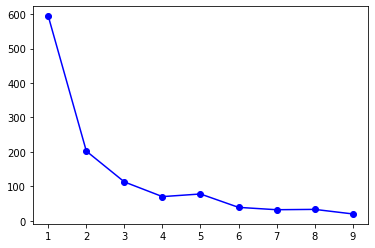

In [29]:

temp_epsilon = []
num_cluster = range(1,10)
for k in num_cluster:
    centers, labels = Kmeans(PointsTrainingK2, k)
    # plt.scatter(Points[:, 0], Points[:, 1], c=labels,s=50, cmap='viridis')
    # plt.show()
    for p in range(k):
        n=0
        for x in centers: 
            z=0
            for i in range(len(labels)):
                if labels[i] == p:
                    z += np.linalg.norm(PointsTrainingK2[i] - x)**2
                    n+=1   
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"bo-")
plt.show()

A partir do gráfico gerado selecionamos $k = 4$

# K-means nos dados de treinamento do dataset adquirido
Aplicamos o K-means com o k selecionado

In [30]:
centersK2, labelsK2 = Kmeans(PointsTrainingK2, 4)

# Visualizando os países que estão no mesmo cluster

In [31]:
Países1 = []
Países2 = []
Países3 = []
Países4 = []

for i in range(len(labelsK2)):
    if(labelsK2[i] == 0):
        Países1.append(ini[i])
    elif(labelsK2[i] == 1):
        Países2.append(ini[i])
    elif(labelsK2[i] == 2):
        Países3.append(ini[i])
    elif(labelsK2[i] == 3):
        Países4.append(ini[i])


In [32]:
for i in Países1:
    print(i)

['Albania', 'EASTERNEUROPE']
['Antigua&Barbuda', 'LATINAMER.&CARIB']
['Australia', 'OCEANIA']
['Bangladesh', 'ASIA(EX.NEAREAST)']
['Belarus', 'C.W.OFIND.STATES']
['Bermuda', 'NORTHERNAMERICA']
['Bolivia', 'LATINAMER.&CARIB']
['Burundi', 'SUB-SAHARANAFRICA']
['Cambodia', 'ASIA(EX.NEAREAST)']
['Cameroon', 'SUB-SAHARANAFRICA']
['CapeVerde', 'SUB-SAHARANAFRICA']
['Djibouti', 'SUB-SAHARANAFRICA']
['DominicanRepublic', 'LATINAMER.&CARIB']
['FrenchGuiana', 'LATINAMER.&CARIB']
['Gabon', 'SUB-SAHARANAFRICA']
['Guinea-Bissau', 'SUB-SAHARANAFRICA']
['Haiti', 'LATINAMER.&CARIB']
['Iceland', 'WESTERNEUROPE']
['Iran', 'ASIA(EX.NEAREAST)']
['Iraq', 'NEAREAST']
['Jordan', 'NEAREAST']
['Kenya', 'SUB-SAHARANAFRICA']
['Kuwait', 'NEAREAST']
['Latvia', 'BALTICS']
['Lesotho', 'SUB-SAHARANAFRICA']
['Liechtenstein', 'WESTERNEUROPE']
['MarshallIslands', 'OCEANIA']
['Martinique', 'LATINAMER.&CARIB']
['Micronesia,Fed.St.', 'OCEANIA']
['Namibia', 'SUB-SAHARANAFRICA']
['NetherlandsAntilles', 'LATINAMER.&CARIB']
['

In [33]:
for i in Países2:
    print(i)

['Algeria', 'NORTHERNAFRICA']
['Anguilla', 'LATINAMER.&CARIB']
['Bahrain', 'NEAREAST']
['Botswana', 'SUB-SAHARANAFRICA']
['Brazil', 'LATINAMER.&CARIB']
['Brunei', 'ASIA(EX.NEAREAST)']
['Burma', 'ASIA(EX.NEAREAST)']
['Chile', 'LATINAMER.&CARIB']
['China', 'ASIA(EX.NEAREAST)']
['Comoros', 'SUB-SAHARANAFRICA']
['Congo,Dem.Rep.', 'SUB-SAHARANAFRICA']
['Cuba', 'LATINAMER.&CARIB']
['CzechRepublic', 'EASTERNEUROPE']
['Denmark', 'WESTERNEUROPE']
['EquatorialGuinea', 'SUB-SAHARANAFRICA']
['Fiji', 'OCEANIA']
['FrenchPolynesia', 'OCEANIA']
['Gambia,The', 'SUB-SAHARANAFRICA']
['Germany', 'WESTERNEUROPE']
['Ghana', 'SUB-SAHARANAFRICA']
['Guadeloupe', 'LATINAMER.&CARIB']
['Guinea', 'SUB-SAHARANAFRICA']
['Honduras', 'LATINAMER.&CARIB']
['Hungary', 'EASTERNEUROPE']
['India', 'ASIA(EX.NEAREAST)']
['Korea,South', 'ASIA(EX.NEAREAST)']
['Malawi', 'SUB-SAHARANAFRICA']
['Maldives', 'ASIA(EX.NEAREAST)']
['Mozambique', 'SUB-SAHARANAFRICA']
['NewZealand', 'OCEANIA']
['Portugal', 'WESTERNEUROPE']
['PuertoRico',

In [34]:
for i in Países3:
    print(i)

['Afghanistan', 'ASIA(EX.NEAREAST)']
['Azerbaijan', 'C.W.OFIND.STATES']
['BritishVirginIs.', 'LATINAMER.&CARIB']
['CaymanIslands', 'LATINAMER.&CARIB']
['CentralAfricanRep.', 'SUB-SAHARANAFRICA']
['Colombia', 'LATINAMER.&CARIB']
['Congo,Repub.ofthe', 'SUB-SAHARANAFRICA']
["Coted'Ivoire", 'SUB-SAHARANAFRICA']
['Ecuador', 'LATINAMER.&CARIB']
['Eritrea', 'SUB-SAHARANAFRICA']
['Estonia', 'BALTICS']
['Finland', 'WESTERNEUROPE']
['Grenada', 'LATINAMER.&CARIB']
['Ireland', 'WESTERNEUROPE']
['Kazakhstan', 'C.W.OFIND.STATES']
['Laos', 'ASIA(EX.NEAREAST)']
['Liberia', 'SUB-SAHARANAFRICA']
['Madagascar', 'SUB-SAHARANAFRICA']
['Mali', 'SUB-SAHARANAFRICA']
['Mauritania', 'SUB-SAHARANAFRICA']
['Mauritius', 'SUB-SAHARANAFRICA']
['Mongolia', 'ASIA(EX.NEAREAST)']
['Oman', 'NEAREAST']
['Pakistan', 'ASIA(EX.NEAREAST)']
['PapuaNewGuinea', 'OCEANIA']
['Peru', 'LATINAMER.&CARIB']
['Philippines', 'ASIA(EX.NEAREAST)']
['Rwanda', 'SUB-SAHARANAFRICA']
['SaintLucia', 'LATINAMER.&CARIB']
['Suriname', 'LATINAMER.&C

In [35]:
for i in Países4:
    print(i)

['Argentina', 'LATINAMER.&CARIB']
['Armenia', 'C.W.OFIND.STATES']
['Aruba', 'LATINAMER.&CARIB']
['Austria', 'WESTERNEUROPE']
['Bahamas,The', 'LATINAMER.&CARIB']
['Barbados', 'LATINAMER.&CARIB']
['Belgium', 'WESTERNEUROPE']
['Belize', 'LATINAMER.&CARIB']
['Benin', 'SUB-SAHARANAFRICA']
['Bhutan', 'ASIA(EX.NEAREAST)']
['Bulgaria', 'EASTERNEUROPE']
['BurkinaFaso', 'SUB-SAHARANAFRICA']
['Chad', 'SUB-SAHARANAFRICA']
['CostaRica', 'LATINAMER.&CARIB']
['Dominica', 'LATINAMER.&CARIB']
['Egypt', 'NORTHERNAFRICA']
['ElSalvador', 'LATINAMER.&CARIB']
['Ethiopia', 'SUB-SAHARANAFRICA']
['France', 'WESTERNEUROPE']
['Georgia', 'C.W.OFIND.STATES']
['Greece', 'WESTERNEUROPE']
['Guatemala', 'LATINAMER.&CARIB']
['Guyana', 'LATINAMER.&CARIB']
['HongKong', 'ASIA(EX.NEAREAST)']
['Indonesia', 'ASIA(EX.NEAREAST)']
['Israel', 'NEAREAST']
['Jamaica', 'LATINAMER.&CARIB']
['Japan', 'ASIA(EX.NEAREAST)']
['Korea,North', 'ASIA(EX.NEAREAST)']
['Kyrgyzstan', 'C.W.OFIND.STATES']
['Macau', 'ASIA(EX.NEAREAST)']
['Malaysia'

# Teste do dataset de países

In [36]:
labelsTestK2 = aLabel(PointsTestK2, centersK2)

PaísesTest1 = []
PaísesTest2 = []
PaísesTest3 = []
PaísesTest4 = []

for i in range(len(labelsTestK2)):
    if(labelsK2[i] == 0):
        PaísesTest1.append(ini[i])
    elif(labelsK2[i] == 1):
        PaísesTest2.append(ini[i])
    elif(labelsK2[i] == 2):
        PaísesTest3.append(ini[i])
    elif(labelsK2[i] == 3):
        PaísesTest4.append(ini[i])

In [37]:
for i in PaísesTest1:
    print(i)

['Albania', 'EASTERNEUROPE']
['Antigua&Barbuda', 'LATINAMER.&CARIB']
['Australia', 'OCEANIA']
['Bangladesh', 'ASIA(EX.NEAREAST)']
['Belarus', 'C.W.OFIND.STATES']


In [38]:
for i in PaísesTest2:
    print(i)

['Algeria', 'NORTHERNAFRICA']
['Anguilla', 'LATINAMER.&CARIB']
['Bahrain', 'NEAREAST']


In [39]:
for i in PaísesTest3:
    print(i)

['Afghanistan', 'ASIA(EX.NEAREAST)']
['Azerbaijan', 'C.W.OFIND.STATES']


In [40]:
for i in PaísesTest4:
    print(i)

['Argentina', 'LATINAMER.&CARIB']
['Armenia', 'C.W.OFIND.STATES']
['Aruba', 'LATINAMER.&CARIB']
['Austria', 'WESTERNEUROPE']
['Bahamas,The', 'LATINAMER.&CARIB']
['Barbados', 'LATINAMER.&CARIB']
['Belgium', 'WESTERNEUROPE']
['Belize', 'LATINAMER.&CARIB']


Interessante verificar grupo de países semelhantes considerando várias features diferentes, pórem não conseguimos validar o resultado a partir do teste pois com tantas dimensões não é possível um auxílio visual.

# Aplicando DBScan no dataset adquirido
Neste segmento aplicamos o DBScan no dataset de países, novamente este segmento será demorado por rodar diversos DBScan com diferentes parâmetros.

In [41]:
PointsTrainingDB2,PointsTestDB2 = dataSplit(xy) #Dividimos novamente o dataset

In [42]:
epss = 20
minptss = 10

Leps = []
Lminpts = []
Lcluster = []
Lout =[]

for eps in range(1,epss):
    for minpts in range(2,minptss):
        print('Epsilon = ' +str(eps)+ ', Pontos mínimos = '+str(minpts))
        pointlabeldb2,clustersDB2 = DBScan(PointsTrainingDB2,eps,minpts)
        print('Número de clusters encontrados: ' + str(clustersDB2-1))
        counter=collections.Counter(pointlabeldb2)
        print(counter)
        outliers  = pointlabeldb2.count(0)
        print('Número de outliers encontrados: '+str(outliers) +'\n')
        if clustersDB2 < 8:
            Leps.append(eps)
            Lminpts.append(minpts)
            Lcluster.append(clustersDB2-1)
            Lout.append(outliers)



Epsilon = 1, Pontos mínimos = 2
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 3
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 4
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 5
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 6
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 7
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 8
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 1, Pontos mínimos = 9
Número de clusters encontrados: 0
Counter({0: 161})
Número de outliers encontrados: 161

Epsilon = 2, Pontos mínimos = 2


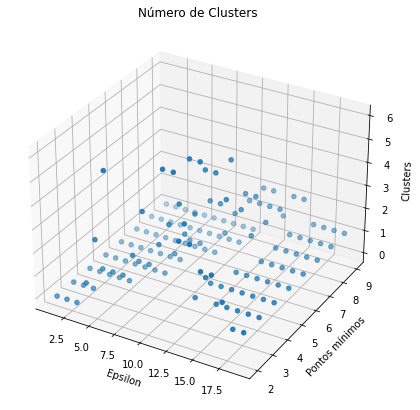

In [43]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(Leps, Lminpts, Lcluster)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Clusters")
plt.title("Número de Clusters")
 

plt.show()

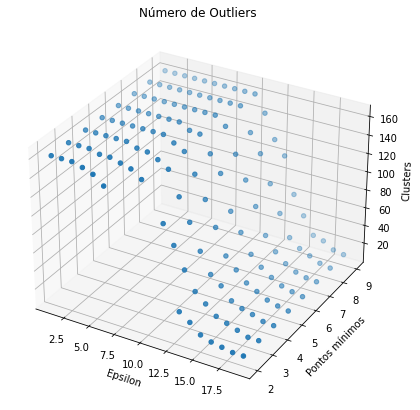

In [44]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(Leps, Lminpts, Lout)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Pontos mínimos")
ax.set_zlabel("Clusters")
plt.title("Número de Outliers")
 
plt.show()

Ao aplicarmos diversos DBScan verificamos que o resultado possuía um número de outliers muito grande, até o $\epsilon = 8$ quase todo o resultado era formado por outliers, a partir desse ponto os outliers começam a diminuir, porém o número de cluster não estabiliza em nenhum momento, até que todo o resultado começa a se tornar somente um cluster. A conclusão desses resultados indica que provavelmente o DBScan não é um bom método de clusterização para o formato desse dataset.

# PCA

A partir daqui utilizaremos o K-means junto com PCA para clusterizar o dataset.  
Será testado com 3 variâncias diferentes, 95%,90% e 80%.

# PCA com 95%

In [45]:
from sklearn.decomposition import PCA
pca = PCA(.95) #Cria uma instância com 95%

In [46]:
PointsTrainingPCA95,PointsTestPCA95 = dataSplit(xy) # Divide os dados entre treino e teste

# PCA 95% sobre os dados

Aplicamos o PCA sobre os dados até estabilizar e as dimensões não diminuírem mais, e podemos ver que as dimensões reduziram de 18 para 5.

In [47]:
lenAntes = len(PointsTrainingPCA95[0])
lenDepois = -1

while lenAntes != lenDepois:
    lenAntes = len(PointsTrainingPCA95[0]) 
    pca.fit(PointsTrainingPCA95)
    PointsTrainingPCA95 = pca.transform(PointsTrainingPCA95)
    PointsTestPCA95 = pca.transform(PointsTestPCA95)
    lenDepois = len(PointsTrainingPCA95[0])
print(lenDepois)

5


# Método do cotovelo sobre os dados com 5 dimensões

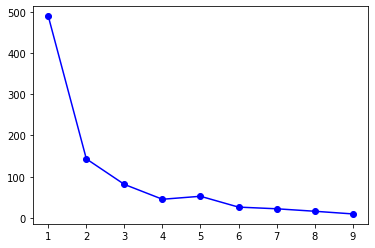

In [48]:
temp_epsilon = []
num_cluster = range(1,10)
for k in num_cluster:
    centers, labels = Kmeans(PointsTrainingPCA95, k)
    for p in range(k):
        n=0
        for x in centers: 
            z=0
            for i in range(len(labels)):
                if labels[i] == p:
                    z += np.linalg.norm(PointsTrainingPCA95[i] - x)**2
                    n+=1   
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"bo-")
plt.show()

Podemos verificar que com 5 dimensões o cotovelo ficou mais evidente em k = 4

# K-means sobre os dados com 5 dimensões com k selecionado
Será rodado o K-means sobre após o PCA com 95% e comparado com os clusters obtidos antes do PCA

In [49]:
centersPCA95, labelsPCA95 = Kmeans(PointsTrainingPCA95, 4)
print(labelsK2 == labelsPCA95)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


Todos os pontos do dataset de treinamento foram atribuídos ao mesmo cluster

# Testando o resultado do K-means com 5 dimensões

In [50]:
labelsTestPCA95 = aLabel(PointsTestPCA95, centersPCA95)
print(labelsTestK2 == labelsTestPCA95)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


Todos os pontos do dataset de teste foram atribuídos ao mesmo cluster

# PCA com 90%

Agora o PCA será instanciado com 90%

In [51]:
from sklearn.decomposition import PCA
pca = PCA(.90) #Cria uma instância do PCA com 90%

In [52]:
PointsTrainingPCA90,PointsTestPCA90 = dataSplit(xy) # Divide os dados entre treino e teste

# PCA 90% sobre os dados

Aplicamos o PCA sobre os dados até estabilizar e as dimensões não diminuírem mais, e podemos ver que as dimensões reduziram de 18 para 3

In [53]:
lenAntes = len(PointsTrainingPCA90[0])
lenDepois = -1

while lenAntes != lenDepois:
    lenAntes = len(PointsTrainingPCA90[0]) 
    pca.fit(PointsTrainingPCA90)
    PointsTrainingPCA90 = pca.transform(PointsTrainingPCA90)
    PointsTestPCA90 = pca.transform(PointsTestPCA90)
    lenDepois = len(PointsTrainingPCA90[0])
print(lenDepois)

3


# Plotando gráfico 3D
Como possuímos 3 dimensões podemos visualizar a disposição do dataset através de um gráfico 3D.

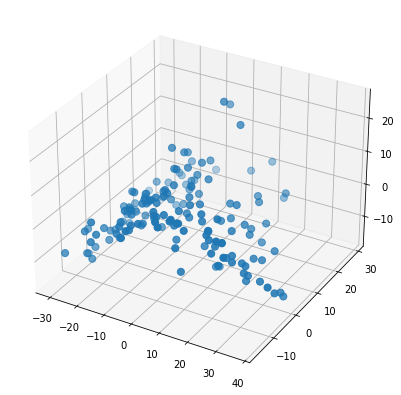

In [54]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(PointsTrainingPCA90[:, 0], PointsTrainingPCA90[:, 1], PointsTrainingPCA90[:, 2],s=50)
plt.show()

# Método do cotovelo sobre os dados com 3 dimensões

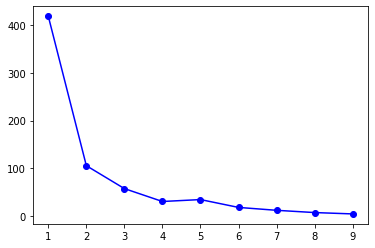

In [55]:
temp_epsilon = []
num_cluster = range(1,10)
for k in num_cluster:
    centers, labels = Kmeans(PointsTrainingPCA90, k)
    for p in range(k):
        n=0
        for x in centers: 
            z=0
            for i in range(len(labels)):
                if labels[i] == p:
                    z += np.linalg.norm(PointsTrainingPCA90[i] - x)**2
                    n+=1   
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"bo-")
plt.show()

Pode-se notar formato semelhante ao de 5 dimensões

# K-means sobre os dados com 3 dimensões com k selecionado
Será rodado o K-means sobre após o PCA com 90% e comparado com os clusters obtidos antes do PCA

In [56]:
centersPCA90, labelsPCA90 = Kmeans(PointsTrainingPCA90, 4)
print(labelsK2 == labelsPCA90)

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True]


Pode-se verificar que 17 pontos foram atribuídos a clusters diferentes, cerca de 10,5% do dataset de treinamento.

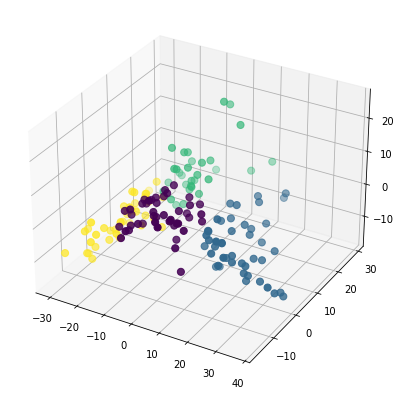

In [57]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(PointsTrainingPCA90[:, 0], PointsTrainingPCA90[:, 1], PointsTrainingPCA90[:, 2],c=labelsPCA90,s=50, cmap='viridis')
plt.show()

# Testando o resultado do K-means com 3 dimensões

In [58]:
labelsTestPCA90 = aLabel(PointsTestPCA90, centersPCA90)
print(labelsTestK2 == labelsTestPCA90)

[ True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True]


Pode-se verificar que 2 pontos foram atribuídos a clusters diferentes, cerca de 11,1% do dataset de teste.

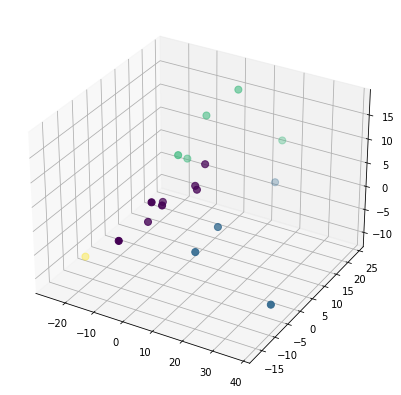

In [59]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(PointsTestPCA90[:, 0], PointsTestPCA90[:, 1], PointsTestPCA90[:, 2], c=labelsTestPCA90,s=50, cmap='viridis')
plt.show()

# PCA com 85%

Agora o PCA será instanciado com 85%

In [60]:
from sklearn.decomposition import PCA
pca = PCA(.85) #Cria uma instância do PCA com 85%

In [61]:
PointsTrainingPCA85,PointsTestPCA85 = dataSplit(xy) # Divide os dados entre treino e teste

# PCA 85% sobre os dados

Aplicamos o PCA sobre os dados até estabilizar e as dimensões não diminuírem mais, e podemos ver que as dimensões reduziram de 18 para 2

In [62]:
lenAntes = len(PointsTrainingPCA85[0])
lenDepois = -1

while lenAntes != lenDepois:
    lenAntes = len(PointsTrainingPCA85[0]) 
    pca.fit(PointsTrainingPCA85)
    PointsTrainingPCA85 = pca.transform(PointsTrainingPCA85)
    PointsTestPCA85 = pca.transform(PointsTestPCA85)
    lenDepois = len(PointsTrainingPCA85[0])
print(lenDepois)

2


# Plotando gráfico 2D
Como possuímos 2 dimensões podemos visualizar a disposição do dataset através de um gráfico 2D.

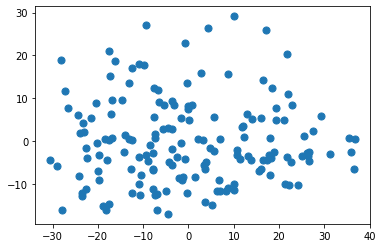

In [63]:
plt.scatter(PointsTrainingPCA85[:, 0], PointsTrainingPCA85[:, 1],s=50)
plt.show()

# Método do cotovelo sobre os dados com 2 dimensões

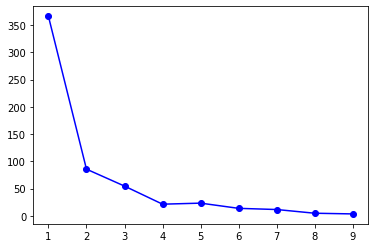

In [64]:
temp_epsilon = []
num_cluster = range(1,10)
for k in num_cluster:
    centers, labels = Kmeans(PointsTrainingPCA85, k)
    # plt.scatter(PointsTrainingPCA85[:, 0], PointsTrainingPCA85[:, 1], c=labels,s=50, cmap='viridis')
    # plt.show()
    for p in range(k):
        n=0
        for x in centers: 
            z=0
            for i in range(len(labels)):
                if labels[i] == p:
                    z += np.linalg.norm(PointsTrainingPCA85[i] - x)**2
                    n+=1   
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"bo-")
plt.show()

Com somente 2 dimensões o cotovelo em 4 clusters ficou ainda mais evidente.

# K-means sobre os dados com 2 dimensões com k selecionado
Será rodado o K-means sobre após o PCA com 85% e comparado com os clusters obtidos antes do PCA

In [65]:
centersPCA85, labelsPCA85 = Kmeans(PointsTrainingPCA85, 4)
print(labelsK2 == labelsPCA85)

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True False False  True  True False  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True]


Pode-se verificar que 13 pontos foram atribuídos a clusters diferentes, cerca de 8% do dataset de treinamento.

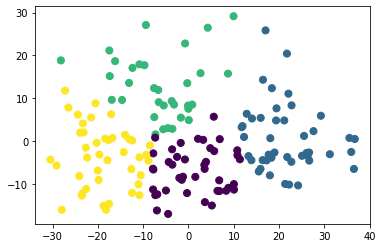

In [66]:
plt.scatter(PointsTrainingPCA85[:, 0], PointsTrainingPCA85[:, 1], c=labelsPCA85,s=50, cmap='viridis')
plt.show()

# Testando o resultado do K-means com 2 dimensões

In [67]:
labelsTestPCA85 = aLabel(PointsTestPCA85, centersPCA85)
print(labelsTestK2 == labelsTestPCA85)

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True]


Pode-se verificar que 1 ponto foI atribuído a cluster diferente, cerca de 5.5% do dataset de teste.

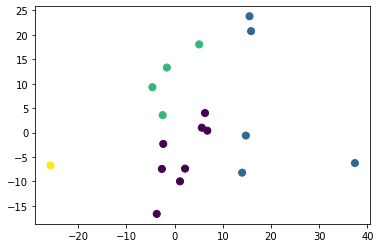

In [68]:
plt.scatter(PointsTestPCA85[:, 0], PointsTestPCA85[:, 1], c=labelsTestPCA85,s=50, cmap='viridis')
plt.show()

# Conclusões Finais

## Normalização e Inicialização dos dados

Logo após ler os dados de cada dataset foi utilizado a normalização Min-Max, pois verificou-se que escalas difentes tinha grande efeito no resultado da clusterização, haviámos começado o desenvolvimento do projeto pela implementação do K-means, ao rodar um teste sobre o cluster.dat tivémos o seguinte resultado.


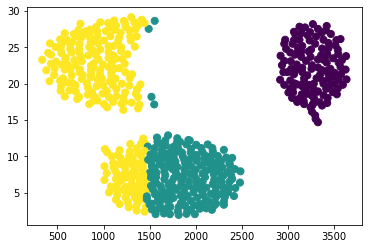

In [69]:
with open('cluster.dat') as f:
    lines = f.readlines()
    xy = np.array([[float(line.split()[0]),float(line.split()[1])] for line in lines])
centers, labels = Kmeans(xy, 3)
plt.scatter(xy[:, 0], xy[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

Em um primeiro momento pensamos ser um erro na implementação, pórem a analisar as escalas dos eixos, verificamos que uma pequena mudança no eixo x afetava muito mais o cálculo da distância do que uma grande mudança no eixo y, sendo assim era necessário normalizar os dados antes de testar a implementação do método de clusterização.  
  
Tão importante quanto a normalização é a inicialização do método, principalmente no K-means, que diferente do DBScan, precisamos determinar o número de clusters que desejamos encontrar. Escolhemos inicializar selecionando pontos aleatórios dentro do cluster, durante a execução do relatório tivemos momentos que dependendo da utilização de seeds diferentes para gerar os primeiros centros aleatórios encontramos somente 2 cluster no cluster.dat como melhor número de clusters, verificando a importância de executar diferentes inicializações para verificar a mais adequada. Segue um exemplo de uma implementação do K-Means que a única diferença é o seed passado para selecionar centros aleatórios.

In [70]:
def KmeansSeed(X, n_clusters):
    # Escolhe centros aleatórios
    solving = True 
    rng = np.random.RandomState(7)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while solving:
        # Definimos labels para os pontos mais próximos dos centros
        labels = aLabel(X, centers)
        
        # Encontra novos centros
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Verifica se convergiu
        if np.all(centers == new_centers):
            solving = False
        centers = new_centers
    
    return centers, labels

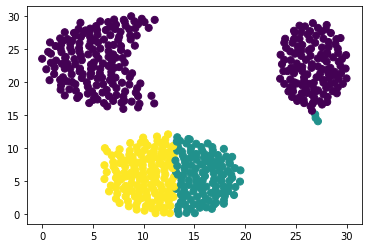

In [71]:
xy = MinMax(xy)
centers, labels = KmeansSeed(xy, 3)
plt.scatter(xy[:, 0], xy[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

Pode-se verificar que apenas alterando a inicialização mudou drasticamente o resultado obtido.

## Número de clusters obtidos

Para o primeiro dataset ambos K-Means e DBScan obtiveram 3 clusters para representar os dados, como possuía poucas dimensões foi possível visualizar que foram resultados coerentes e bem representativos. Para o segundo dataset a visualização do número ideal de dataset não ficou tão clara, o método do cotovelo indicou 4 porém não tão claro quanto o primeiro e o DBScan não conseguiu chegar a uma análise coerentes, quase todos os dados foram considerados outliers, levando para a discussão do próximo tópico.

## Vantagens e desvantagens de cada método

O K-means foi mais fácil de ser implementado, possui um custo menor de execução e possui métodos diretos para determinar seus parâmetros iniciais, porém método extremamente sensível a outliers e a inicialização, como verificado uma pequena alteração na inicialização teve grande impacto no resultado.
    
O DBScan apresentou maior dificuldade na implementação e grande custo para determinar seus parâmetros iniciais, principalmente por ter sido necessário executar um grande número de vezes, mas ele conseguiu representar formatos não circulares de clusters e lida bem com outliers, porém como visto com o segundo dataset ele não foi possível determinar um bom resultado, com o auxílio do PCA, pode-se entender que a configuração do dataset pode afetar bastante o seu resultado.

## Redução da dimensionalidade

Como citado acima, reduzir a dimensionalidade do dataset permitiu obter uma visualização gráfica do formato e configuração dele, o qual não era possível compreender com 18 dimensões, pórem teve um custo no resultado final. Ao reduzir para 5 dimensões o resultado não se alterou, mas ainda não possível plotar resultados do dataset, com 3 dimensões obtivemos uma visualização 3D do dataset, mas cerca de 10% dos resultados foram diferentes, curiosamente com 2 dimensões obtivemos um erro um pouco menor.  
  
A dimensionalidade auxiliou na visualização e os resultados se alteraram pouco, caso o cenário exija altas precisões o PCA pode ser um auxílio para escolher métodos e alguns parâmetros para ser utilizado no dataset original, caso contrário o PCA apresentará resultados suficientemente corretos

# Contribuição individual

Rafael Galib 204904  
Finalizou a implementação do K-Means e implementou a função aLabel, realizou a leitura dos dados.  
  
Heigon Soldera 217638  
Iniciou a implementação do K-Means, implementou o DBScan e o método do cotovelo. Rodou os dados com PCA

Grande parte do projeto foi desenvolvida em conjunto em reunião online através da plataforma Discord, sendo assim, ambos auxiliaram, acompanharam e contribuíram nas implementações de cada um.